In [9]:
import warnings
warnings.filterwarnings('ignore')

from arraylake import Client

import deepsensor.torch
from deepsensor.data import DataProcessor
from deepsensor.data import TaskLoader




## Fetching Data

In [10]:
# Instantiate an ArrayLake client 
client = Client()

# Connect to context datasets
context_repo = client.get_repo('great-lakes-ai-lab/great-lakes-osd')

# Load bathymetry
ds_bathymetry_raw = context_repo.to_xarray("bathymetry")
print(ds_bathymetry_raw)

<xarray.Dataset> Size: 696kB
Dimensions:     (lat: 240, lon: 360)
Coordinates:
  * lat         (lat) float64 2kB 41.39 41.42 41.46 41.49 ... 48.73 48.76 48.79
  * lon         (lon) float64 3kB -92.07 -92.03 -91.98 ... -76.27 -76.23 -76.18
Data variables:
    bathymetry  (lat, lon) float64 691kB ...


In [11]:
# Load lake mask
ds_lakemask_raw = context_repo.to_xarray("lakemask")
print(ds_lakemask_raw)

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 838, lon: 1181)
Coordinates:
  * lat      (lat) float64 7kB 38.87 38.89 38.9 38.92 ... 50.58 50.59 50.61
  * lon      (lon) float64 9kB -92.42 -92.41 -92.39 ... -75.91 -75.9 -75.88
Data variables:
    mask     (lat, lon) float32 4MB ...


In [30]:
# Connect to the GLSEA repository and open in xarray
glsea3_repo = client.get_repo('great-lakes-ai-lab/glsea3')
ds_glsea3_raw = glsea3_repo.to_xarray()
ds_glsea3_raw = ds_glsea3_raw.drop('crs')

# Display GLSEA3 xarray dataset
print(ds_glsea3_raw)

<xarray.Dataset> Size: 23GB
Dimensions:  (lon: 1181, time: 5863, lat: 838)
Coordinates:
  * lon      (lon) float64 9kB -92.42 -92.41 -92.39 ... -75.91 -75.9 -75.88
  * lat      (lat) float64 7kB 38.87 38.89 38.9 38.92 ... 50.58 50.59 50.61
  * time     (time) datetime64[ns] 47kB 2006-12-11T12:00:00 ... 2022-12-31T12...
Data variables:
    sst      (time, lat, lon) float32 23GB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    GDAL:         GDAL 2.1.3, released 2017/20/01
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...
    history:      Tue Feb 13 20:43:56 2024: cdo selyear,2006 GLSEA3_SST_2006_...
    source:       2006_345_glsea.asc
    title:        SST from Great Lakes Surface Environmental Analysis (GLSEA)


In [31]:
# Connect to the GLSEA repository and open in xarray
glsea_repo = client.get_repo('great-lakes-ai-lab/glsea')
ds_glsea_raw = glsea_repo.to_xarray('glsea-data')
ds_glsea_raw = ds_glsea_raw.drop('crs')

# Display GLSEA3 xarray dataset
print(ds_glsea_raw)

<xarray.Dataset> Size: 40GB
Dimensions:  (lat: 838, lon: 1181, time: 10221)
Coordinates:
  * lat      (lat) float64 7kB 38.87 38.89 38.9 38.92 ... 50.58 50.59 50.61
  * lon      (lon) float64 9kB -92.42 -92.41 -92.39 ... -75.91 -75.9 -75.88
  * time     (time) datetime64[ns] 82kB 1995-01-01T12:00:00 ... 2022-12-31T12...
Data variables:
    sst      (time, lat, lon) float32 40GB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    GDAL:         GDAL 2.1.3, released 2017/20/01
    history:      Tue Feb 13 20:15:43 2024: cdo selyear,1995 GLSEA_SST_1995_2...
    source:       1995_001_glsea.asc
    title:        SST from Great Lakes Surface Environmental Analysis (GLSEA)


In [35]:
ds_glsea3_sample_raw = ds_glsea3_raw.sel(time=slice("2010-01-01","2011-12-31"))
print(ds_glsea3_sample_raw)

<xarray.Dataset> Size: 3GB
Dimensions:  (lon: 1181, time: 730, lat: 838)
Coordinates:
  * lon      (lon) float64 9kB -92.42 -92.41 -92.39 ... -75.91 -75.9 -75.88
  * lat      (lat) float64 7kB 38.87 38.89 38.9 38.92 ... 50.58 50.59 50.61
  * time     (time) datetime64[ns] 6kB 2010-01-01T12:00:00 ... 2011-12-31T12:...
Data variables:
    sst      (time, lat, lon) float32 3GB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    GDAL:         GDAL 2.1.3, released 2017/20/01
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...
    history:      Tue Feb 13 20:43:56 2024: cdo selyear,2006 GLSEA3_SST_2006_...
    source:       2006_345_glsea.asc
    title:        SST from Great Lakes Surface Environmental Analysis (GLSEA)


## DataProcessor

### Initializing a DataProcessor

In [14]:
data_processor = DataProcessor(x1_name="lat", x2_name="lon")
print(data_processor)

DataProcessor with normalisation params:
{'coords': {'time': {'name': 'time'},
            'x1': {'map': None, 'name': 'lat'},
            'x2': {'map': None, 'name': 'lon'}}}


### Normalizing data with a DataProcessor

In [16]:
ds_bathymetry = data_processor(ds_bathymetry_raw)
ds_bathymetry

<xarray.Dataset> Size: 696kB
Dimensions:     (x1: 240, x2: 360)
Coordinates:
  * x1          (x1) float64 2kB 0.0 0.001948 0.003895 ... 0.4616 0.4635 0.4655
  * x2          (x2) float64 3kB 0.0 0.002786 0.005571 ... 0.9944 0.9972 1.0
Data variables:
    bathymetry  (x1, x2) float64 691kB nan nan nan nan nan ... nan nan nan nan

In [23]:
ds_lakemask = data_processor(ds_lakemask_raw)
ds_lakemask

<xarray.Dataset> Size: 4MB
Dimensions:  (x1: 838, x2: 1181)
Coordinates:
  * x1       (x1) float64 7kB -0.1585 -0.1576 -0.1568 ... 0.578 0.5789 0.5798
  * x2       (x2) float64 9kB -0.02193 -0.02105 -0.02017 ... 1.017 1.018 1.019
Data variables:
    mask     (x1, x2) float32 4MB -0.4052 -0.4052 -0.4052 ... -0.4052 -0.4052

In [36]:
ds_glsea3 = data_processor(ds_glsea3_sample_raw)
print(ds_glsea3)

<xarray.Dataset> Size: 3GB
Dimensions:  (time: 730, x1: 838, x2: 1181)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2010-01-01T12:00:00 ... 2011-12-31T12:...
  * x1       (x1) float64 7kB -0.1585 -0.1576 -0.1568 ... 0.578 0.5789 0.5798
  * x2       (x2) float64 9kB -0.02193 -0.02105 -0.02017 ... 1.017 1.018 1.019
Data variables:
    sst      (time, x1, x2) float32 3GB nan nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    GDAL:         GDAL 2.1.3, released 2017/20/01
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...
    history:      Tue Feb 13 20:43:56 2024: cdo selyear,2006 GLSEA3_SST_2006_...
    source:       2006_345_glsea.asc
    title:        SST from Great Lakes Surface Environmental Analysis (GLSEA)


### DataProcessor Configuration

In [39]:
print(data_processor)

DataProcessor with normalisation params:
{'bathymetry': {'method': 'mean_std',
                'params': {'mean': 94.77594322781665,
                           'std': 66.08138512144093}},
 'coords': {'time': {'name': 'time'},
            'x1': {'map': (41.39390182495117, 57.28290939331055),
                   'name': 'lat'},
            'x2': {'map': (-92.07150268554688, -76.1824951171875),
                   'name': 'lon'}},
 'mask': {'method': 'mean_std',
          'params': {'mean': 0.1410539597272873, 'std': 0.3480772376060486}},
 'sst': {'method': 'mean_std',
         'params': {'mean': 9.06270980834961, 'std': 7.3535542488098145}}}


## Initializing a TaskLoader

In [40]:
task_loader = TaskLoader(
    context=[ds_glsea3, ds_bathymetry, ds_lakemask],
    target=ds_glsea3,
)

print(task_loader)

TaskLoader(3 context sets, 1 target sets)
Context variable IDs: (('sst',), ('bathymetry',), ('mask',))
Target variable IDs: (('sst',),)


### Calling a TaskLoader

In [48]:
task = task_loader("2011-06-25T12:00:00", context_sampling=[200, "all", "all"], target_sampling="all")
print(task)

time: 2011-06-25 12:00:00
ops: []
X_c: [(2, 200), ((1, 240), (1, 360)), ((1, 838), (1, 1181))]
Y_c: [(1, 200), (1, 240, 360), (1, 838, 1181)]
X_t: [((1, 838), (1, 1181))]
Y_t: [(1, 838, 1181)]



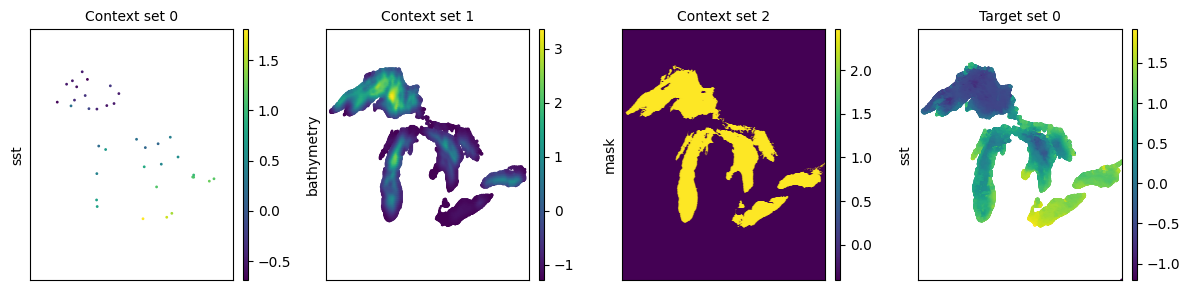

In [49]:
import matplotlib.pyplot as plt
deepsensor.plot.task(task, task_loader)
plt.show()

## Initializing a ConvNP

In [50]:
import deepsensor.torch
from deepsensor.model import ConvNP

In [51]:
model = ConvNP(data_processor, task_loader, internal_density=500)

dim_yc inferred from TaskLoader: (1, 1, 1)
dim_yt inferred from TaskLoader: 1
dim_aux_t inferred from TaskLoader: 0
encoder_scales inferred from TaskLoader: [0.0004410444526001811, 0.0009737738873809576, 0.0004410444526001811]
decoder_scale inferred from TaskLoader: 0.002


In [52]:
print(model)

ConvNP with config:
{
    "dim_x": 2,
    "dim_yc": [
        1,
        1,
        1
    ],
    "dim_yt": 1,
    "dim_aux_t": 0,
    "dim_lv": 0,
    "conv_arch": "unet",
    "unet_channels": [
        64,
        64,
        64,
        64
    ],
    "unet_resize_convs": true,
    "unet_resize_conv_interp_method": "bilinear",
    "aux_t_mlp_layers": null,
    "likelihood": "het",
    "unet_kernels": 5,
    "internal_density": 500,
    "encoder_scales": [
        0.0004410444526001811,
        0.0009737738873809576,
        0.0004410444526001811
    ],
    "encoder_scales_learnable": false,
    "decoder_scale": 0.002,
    "decoder_scale_learnable": false,
    "num_basis_functions": 64,
    "epsilon": 0.01
}


In [53]:
encoding = deepsensor.model.nps.compute_encoding_tensor(model, task)
print(f"SetConv encoding tensor shape: {encoding.shape}")

SetConv encoding tensor shape: (1, 6, 480, 624)


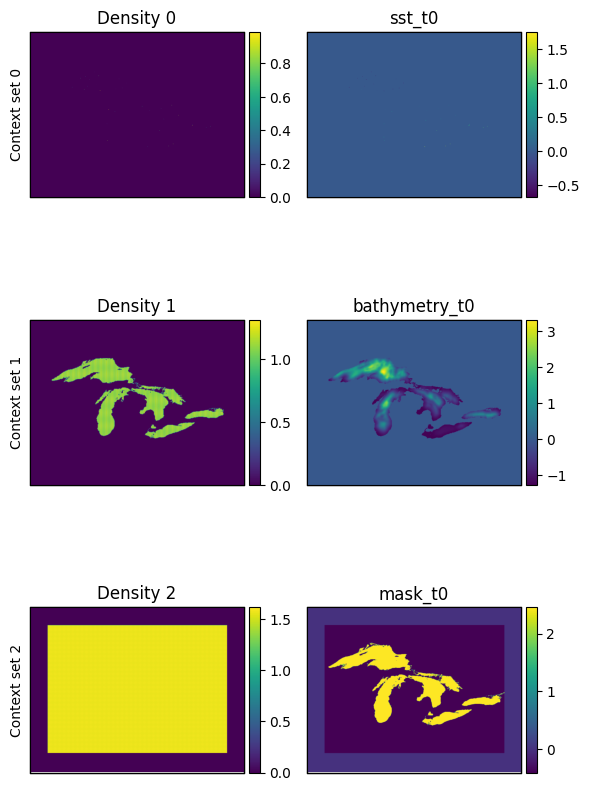

In [55]:
deepsensor.plot.context_encoding(model, task, task_loader)